In [1]:
#Imports
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

In [2]:
#Defining a function to draw a given network
def draw_network(network, title):
    plt.figure(figsize = (10, 6), dpi = 100)
    nx.draw(network, width = 0.3, node_size = 5, node_color = 'red')
    plt.title('Western States Power Grid of the United States {}'.format(title))
    plt.show()
    

#Defining a function to calculate the local and global efficiencies as well as the clustering coefficient of a given network
def efficiency(network):
    local_eff = nx.local_efficiency(network)
    global_eff = nx.global_efficiency(network)
    cluster_coeff = nx.average_clustering(network)
    print('The local efficiency is', round(local_eff, 4))
    print('The global efficiency is', round(global_eff, 4))
    print('The clustering coefficient is', round(cluster_coeff, 4))
        

#Defining a function to delete edges above a specified critical value in a given network
def delete_edges(dictionary, avg, std, N):
    network = nx.read_gml('power.gml', label = 'id')
    for edge in dictionary:
        if dictionary[edge] > (avg + (N * std)):
            network.remove_edge(edge[0], edge[1])
    return network

Graph with 4941 nodes and 6594 edges


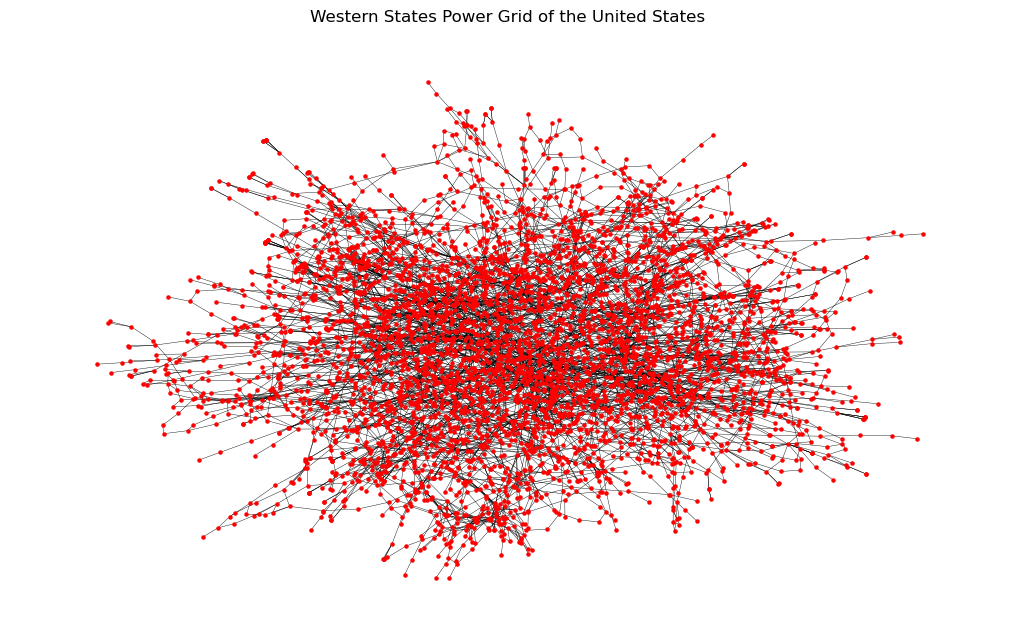

The local efficiency is 0.0845
The global efficiency is 0.0629
The clustering coefficient is 0.0801


In [3]:
#Reading the gml of the original power grid and creating a dictionary of the edge betweenness values
power_grid = nx.read_gml('power.gml', label = 'id')
print(power_grid)
betweenness_dict = nx.edge_betweenness_centrality(power_grid)
    
#Loop to calculate the average and standard deviation of the edge betweenness values of the original power grid
betweenness_list = []
for value in betweenness_dict.values():
    betweenness_list.append(value)
betweenness_avg = np.average(betweenness_list)
betweenness_std = np.std(betweenness_list)
    
#Drawing and calculating the efficiencies of the original power grid
draw_network(power_grid, '')
efficiency(power_grid)

Graph with 4941 nodes and 6465 edges


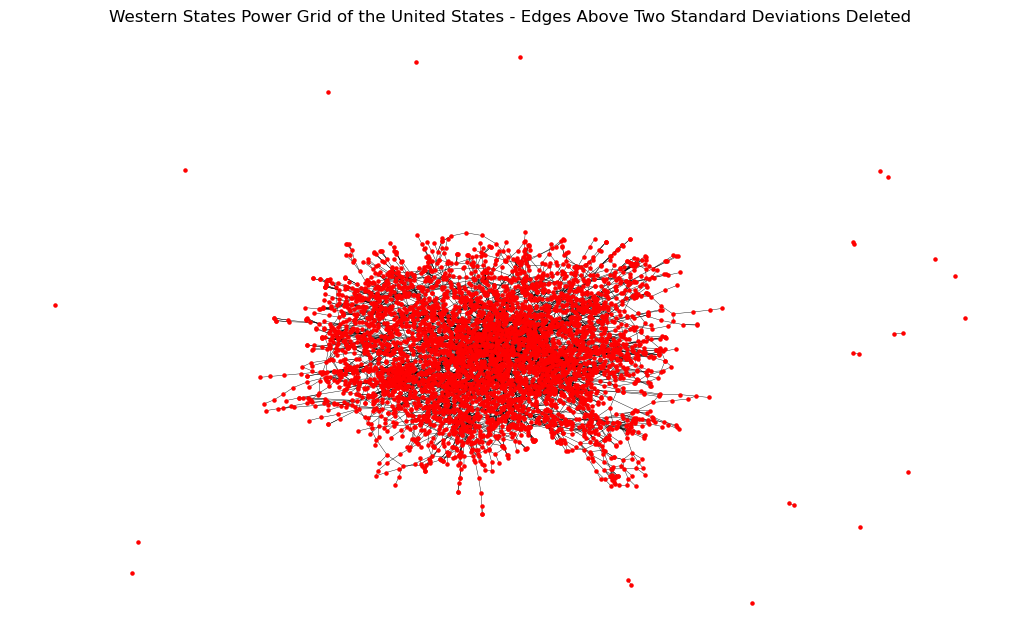

The local efficiency is 0.0831
The global efficiency is 0.0435
The clustering coefficient is 0.0787


In [4]:
#Drawing and calculating the efficiences of the new power grid after deleting edges
#of a betweenness value higher than two standard deviations above the average value
power_grid_del_2sd = delete_edges(betweenness_dict, betweenness_avg, betweenness_std, 2)
print(power_grid_del_2sd)
draw_network(power_grid_del_2sd, '- Edges Above Two Standard Deviations Deleted')
efficiency(power_grid_del_2sd)

Graph with 4941 nodes and 6385 edges


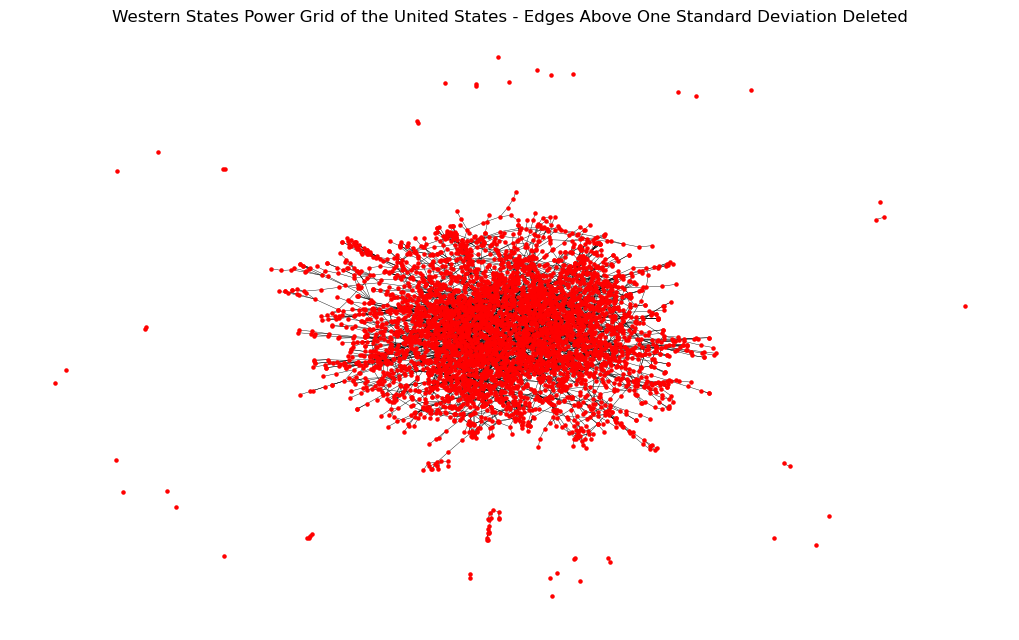

The local efficiency is 0.0817
The global efficiency is 0.0372
The clustering coefficient is 0.0775


In [5]:
#Drawing and calculating the efficiences of the new power grid after deleting edges
#of a betweenness value higher than one standard deviation above the average value
power_grid_del_1sd = delete_edges(betweenness_dict, betweenness_avg, betweenness_std, 1)
print(power_grid_del_1sd)
draw_network(power_grid_del_1sd, '- Edges Above One Standard Deviation Deleted')
efficiency(power_grid_del_1sd)